In [29]:
import os
import pandas as pd

yeoyun=pd.read_csv(r"yeoyun.csv",encoding='utf-8-sig')


In [ ]:


# 여러 데이터 파일을 읽고 확인

merged_df=merged_df.sort_values(by=['지점', '일시'])

df2=pd.read_excel('test.xlsx', engine='openpyxl')


df2=pd.read_csv("test.csv",encoding='utf-8-sig')

df2["지하철역명"] = df2["지하철역명"].str.replace(r'\b서울\b', '서울역', regex=True)

set(df["station_name"]) -set(df2["station_name"])

df2.to_csv('특징.csv',encoding='utf-8-sig',index=False)

In [ ]:
df23=pd.read_csv('subway2023-12.csv',encoding='utf-8-sig')
df22=pd.read_csv('subway2022-01.csv',encoding='utf-8-sig')
df22.rename(columns = {'train_subway22.station_name' : 'station_name'}, inplace = True)
df23.rename(columns = {'train_subway23.station_name' : 'station_name'}, inplace = True)


In [ ]:
set(df23['station_name']) -set(df['station_name'])

'성수E', '응암S',-> 순환선역
진접, 오남, 별내별가람-> 특징별에서 누락 
데이터 프레임 병합을 위해 역명 일원화

In [ ]:
#csv 파일 읽고 합쳐서 저장
import os
import glob

# 1. 폴더 경로 설정
folder_path = r"C:\Users\katch\workspace\mid\sub"
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# 2. 데이터프레임 리스트 생성
df_list = []

for file in csv_files:
    df = pd.read_csv(file)
    # 접두어 제거: train_subway22., train_subway23. 등
    df.columns = df.columns.str.replace(r"train_subway\d+\.", "", regex=True)
    df_list.append(df)

# 3. 세로 방향으로 병합
total = pd.concat(df_list, ignore_index=True)

# 4. 중복 제거
total = total.drop_duplicates()

# 5. 저장
output_path = os.path.join(folder_path, "total.csv")
total.to_csv(output_path, index=False, encoding='utf-8-sig')

print("✅ 컬럼 통일 + 행 병합 + 중복 제거 완료 → total.csv 저장됨")

In [ ]:
small=total.drop(['stn','station_number','ta','wd','ws','rn_day','hm','si'],axis=1)

In [ ]:
total=total.drop('Unnamed: 0',axis=1)
total.to_csv('total.csv',encoding='utf-8-sig',index=False)

In [ ]:
total['tm'] = pd.to_datetime(total['tm'].astype(str), format='%Y%m%d%H')

In [ ]:
pd.DataFrame(grouped).to_csv('result.csv',encoding='utf-8-sig')


In [ ]:
merged.to_csv("merged.csv",encoding='utf-8-sig',index=False)

In [ ]:
small=small.rename(columns={'tm':'년월일시','line':'호선','station_name':'역','rn_hr1':'강수량_시간'
                           ,'ta_chi':'체감온도','congestion':'혼잡도'})

In [ ]:
timelist=[]
for x in range(24):
    if len(str(x)) == 1:
        timelist.append('0'+str(x))
    else:
        timelist.append(str(x))
for y in timelist:
    for x in ['18','20','19']:
        small=small.drop(small[small['년월일시'] == int('202112'+x+y)].index)
        

In [ ]:
import pandas as pd

# 예시: 큰 DataFrame
# df = pd.read_csv(...)  # 실제 데이터 로드
# 여기서는 구조 예시만
df = pd.DataFrame({
    'timestamp': [2026122811, 2021041510, 2023051209, 2021101012, 2024030115] * 3200000  # 총 1600만 행
})

# 정수 나눗셈으로 연도 추출 → 2021년 아닌 행만 필터링
df = df[df['timestamp'] // 10**6 != 2021]

# 선택적으로 인덱스 초기화
# df = df.reset_index(drop=True)


In [ ]:
merged = small.merge(특징[['환승역여부','지상/지하','구','역','호선']], on=['호선','역'], how='left')

In [ ]:
corr_matrix = merged[['강수량_시간', '체감온도', '혼잡도']].corr()

print(corr_matrix)

In [ ]:
merged=pd.read_csv('small.csv',encoding='utf-8-sig')

In [ ]:
merged[merged['년월일시']==2022101012].to_csv("sample.csv",encoding='utf-8-sig',index=False)

In [ ]:

mask = 특징['지하철호선명'].str.match(r'[1-8]호선')  # 정규표현식: 1~8로 시작하고 '호선' 포함
특징= 특징[mask]                    # 조건에 맞는 행만 유지
특징['지하철호선명'] = 특징['지하철호선명'].str.replace('호선', '', regex=False)  # '호선' 제거

In [ ]:
small=pd.read_csv('small.csv',encoding='utf-8-sig')

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# 1. 날짜 및 파생 변수 생성
small['년월일시'] = pd.to_datetime(small['년월일시'].astype(str), format='%Y%m%d%H')
small['요일'] = small['년월일시'].dt.weekday           # 월=0, ..., 일=6
small['주말여부'] = small['요일'].isin([5, 6])          # 주말: 토(5), 일(6)
small['강수여부'] = small['강수량_시간'] > 0             # 강수량이 0 초과면 비
print(small['요일'].unique())
# ------------------------------------------------------------
# 2. 역별 평일/주말 평균 혼잡도 및 증가율
# ------------------------------------------------------------

평일 = small[~small['주말여부']].groupby('역')['혼잡도'].mean()
주말 = small[small['주말여부']].groupby('역')['혼잡도'].mean()
print(len(평일),len(주말))
weekend_df = pd.DataFrame({
    '평일_혼잡도': 평일,
    '주말_혼잡도': 주말
}).dropna()

weekend_df['주말_증가율'] = (weekend_df['주말_혼잡도'] - weekend_df['평일_혼잡도']) / weekend_df['평일_혼잡도']

# ------------------------------------------------------------
# 3. 역별 비/맑음 평균 혼잡도 및 증가율
# ------------------------------------------------------------

비 = small[small['강수여부']].groupby('역')['혼잡도'].mean()

맑음 = small[~small['강수여부']].groupby('역')['혼잡도'].mean()

rain_df = pd.DataFrame({
    '비_혼잡도': 비,
    '맑음_혼잡도': 맑음
}).dropna()

rain_df['비_증가율'] = (rain_df['비_혼잡도'] - rain_df['맑음_혼잡도']) / rain_df['맑음_혼잡도']

# ------------------------------------------------------------
# 4. 병합 및 상관계수 계산
# ------------------------------------------------------------

merged = pd.merge(weekend_df[['주말_증가율']], rain_df[['비_증가율']], left_index=True, right_index=True)


corr, p_value = pearsonr(merged['주말_증가율'], merged['비_증가율'])

print("✅ 결과")
print(f"상관계수 (주말 대비 & 비 대비 혼잡도 증가율): {corr:.4f}")
print(f"p-value: {p_value:.4e}")


In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# 1. 체감온도 ≤ 0 and 강수량 > 0 → 눈 오는 경우
snow_df = small[(small['체감온도'] <= 0) & (small['강수량_시간'] > 0)]

# 2. 결측치 제거 (혹시 있을 수 있으므로)
snow_df = snow_df[['강수량_시간', '혼잡도']].dropna()

# 3. 상관계수 계산
if len(snow_df) < 2:
    print("⚠️ 눈 오는 조건을 만족하는 데이터가 부족합니다. (n =", len(snow_df), ")")
else:
    corr, p_value = pearsonr(snow_df['강수량_시간'], snow_df['혼잡도'])
    print("✅ 눈 오는 날 기준")
    print(f"상관계수 (강수량 vs 혼잡도): {corr:.4f}")
    print(f"p-value: {p_value:.4e}")


In [ ]:
from scipy.stats import pointbiserialr

# 눈 여부 만들기 (명목척도: 0 = 안 옴, 1 = 눈 옴)
small['눈'] = ((small['체감온도'] <= 0) & (small['강수량_시간'] > 0)).astype(int)

# 결측치 제거
valid = small[['눈', '혼잡도']].dropna()

# 포인트 바이serial 상관계수 계산
corr, p_value = pointbiserialr(valid['눈'], valid['혼잡도'])

print("✅ 눈 여부 vs 혼잡도")
print(f"Point-Biserial 상관계수: {corr:.4f}")
print(f"p-value: {p_value:.4e}")


In [ ]:
result_df.to_csv('역별상관계쑤.csv',encoding='utf-8-sig',index=False)

In [ ]:
import pandas as pd

# 예: df = pd.read_csv("your_data.csv")

# 기상 요소와 혼잡도만 추출
weather_cols = ['ta', 'ws', 'hm', 'wd', 'rn_hr1', 'rn_day', 'ta_chi']
target_col = 'congestion'

# 역별로 상관계수 계산
result = {}

for station, group in yeoyun.groupby('station_name'):
    # 혼잡도와 기상 요소가 포함된 데이터만 추출
    sub_df = group[weather_cols + [target_col]].dropna()
    
    # 상관계수 계산 (Pandas 기본은 피어슨 상관계수)
    corr = sub_df.corr()[target_col][weather_cols]
    
    # 결과 저장
    result[station] = corr

# 결과를 하나의 DataFrame으로 변환
result_df = pd.DataFrame(result).T  # 역을 index로 하여 보기 좋게 변환

# 상위 몇 개 확인
print(result_df.head())


In [61]:


# 기상 요소와 혼잡도만 추출
weather_cols = ['ta', 'ws', 'hm', 'wd', 'rn_hr1', 'rn_day', 'ta_chi']
target_col = 'congestion'

# 필요한 컬럼만 추출 후 결측값 제거
sub_df = yeoyun[weather_cols + [target_col]].dropna()

# 상관계수 계산 (기본: 피어슨 상관계수)
corr_series = sub_df.corr()[target_col][weather_cols]

# 결과 출력
print("전체 데이터 기준 혼잡도와 기상 요소 간 상관계수:")
print(corr_series)


전체 데이터 기준 혼잡도와 기상 요소 간 상관계수:
ta        0.073825
ws        0.044082
hm       -0.127232
wd        0.037309
rn_hr1   -0.005865
rn_day   -0.007322
ta_chi    0.063358
Name: congestion, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 스타일 설정 (선택)
sns.set(style='whitegrid')

# 시각화할 기상 요소 목록
weather_cols = ['ta', 'ws', 'hm', 'wd', 'rn_hr1', 'rn_day', 'ta_chi']

# 서브플롯 만들기
plt.figure(figsize=(18, 12))

for idx, col in enumerate(weather_cols, 1):
    plt.subplot(3, 3, idx)
    sns.regplot(data=yeoyun, x=col, y='congestion', scatter_kws={'alpha': 0.4}, line_kws={'color': 'red'})
    plt.title(f'{col} vs congestion')

plt.tight_layout()
plt.show()


In [31]:
# matplotlib에 폰트를 설정합니다.

# matplotlib 라이브러리를 불러옵니다.

# 설치된 폰트 목록을 갱신하고, 'NanumGothic' 폰트를 기본 폰트로 설정합니다.


# 한글이 깨지지 않도록 하기 위해서 minus 표시를 설정합니다.
plt.rcParams['axes.unicode_minus'] = False

폰트 설정 완료: Pretendard


findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard'

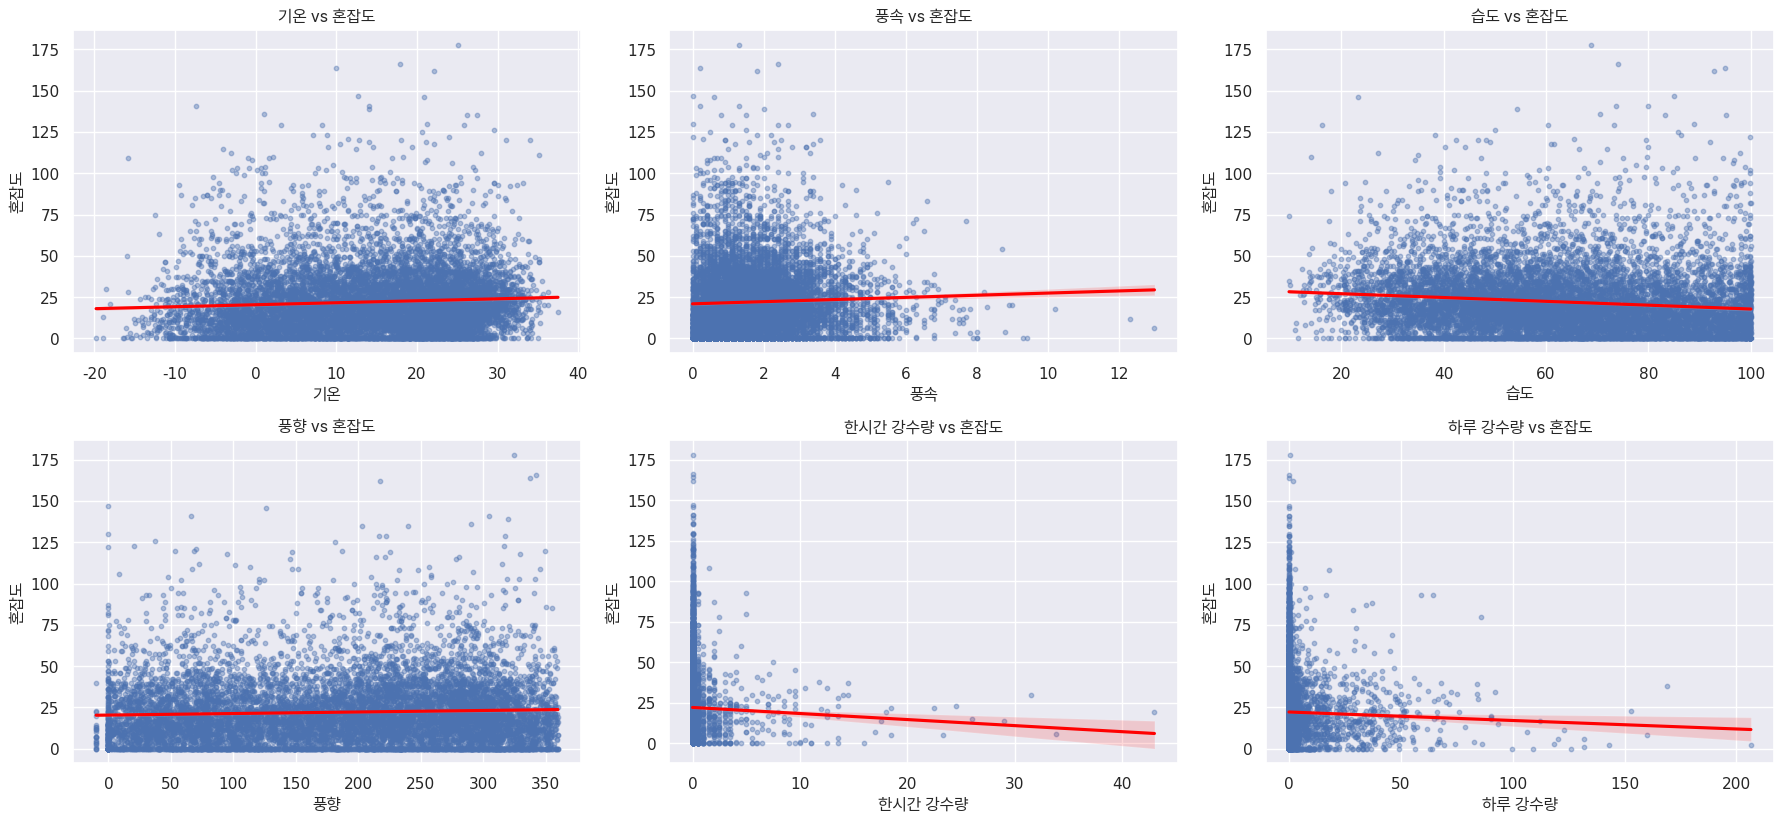

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import warnings
warnings.filterwarnings(action='ignore')
font_path = r"C:\Users\katch\Downloads\Pretendard-1.3.9\public\static\Pretendard-Regular.otf"

# 폰트 로딩 시도
try:
    font_prop = fm.FontProperties(fname=font_path)
    font_name = font_prop.get_name()
    plt.rc('font', family=font_name)
    sns.set(font=font_name)  # seaborn도 같이 설정
    plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지
    print(f"폰트 설정 완료: {font_name}")
except Exception as e:
    print("❌ 폰트를 불러오는 데 실패했습니다:", e)

# 1. 랜덤 샘플링 (예: 10,000개)
sampled = yeoyun.sample(n=10000, random_state=42)

# 2. 시각화할 기상 요소 목록
weather_cols = ['ta', 'ws', 'hm', 'wd', 'rn_hr1', 'rn_day']
한국어={'ta':'기온','ws':'풍속', 'hm':'습도','wd':'풍향','rn_hr1':'한시간 강수량','rn_day':'하루 강수량', 'ta_chi':'체감온도'}
# 3. 플롯
plt.figure(figsize=(18, 12))


for idx, col in enumerate(weather_cols, 1):
    plt.subplot(3, 3, idx)
    sns.regplot(data=sampled, x=col, y='congestion',
                scatter_kws={'alpha': 0.4, 's': 10},
                line_kws={'color': '#F44691'})
    plt.title(f'{한국어[col]} vs 혼잡도', fontproperties=font_prop)
    plt.xlabel(한국어[col], fontproperties=font_prop)
    plt.ylabel('혼잡도', fontproperties=font_prop)


plt.tight_layout()
plt.show()

폰트 설정 완료: Pretendard


findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard' not found.
findfont: Font family 'Pretendard'

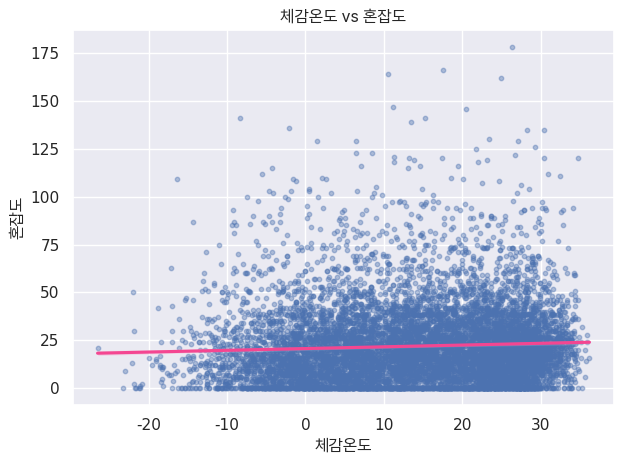

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import warnings
warnings.filterwarnings(action='ignore')
font_path = r"C:\Users\katch\Downloads\Pretendard-1.3.9\public\static\Pretendard-Regular.otf"

# 폰트 로딩 시도
try:
    font_prop = fm.FontProperties(fname=font_path)
    font_name = font_prop.get_name()
    plt.rc('font', family=font_name)
    
    plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지
    print(f"폰트 설정 완료: {font_name}")
except Exception as e:
    print("❌ 폰트를 불러오는 데 실패했습니다:", e)

# 1. 랜덤 샘플링 (예: 10,000개)
sampled = yeoyun.sample(n=10000, random_state=42)

# 2. 시각화할 기상 요소 목록
col='ta_chi'
한국어={'ta':'기온','ws':'풍속', 'hm':'습도','wd':'풍향','rn_hr1':'한시간 강수량','rn_day':'하루 강수량', 'ta_chi':'체감온도'}
# 3. 플롯




sns.regplot(data=sampled, x=col, y='congestion',
            scatter_kws={'alpha': 0.4, 's': 10},
            line_kws={'color': '#F44691'})
plt.title(f'{한국어[col]} vs 혼잡도', fontproperties=font_prop)
plt.xlabel(한국어[col], fontproperties=font_prop)
plt.ylabel('혼잡도', fontproperties=font_prop)


plt.tight_layout()
plt.savefig("체감온도_vs_혼잡도.png", dpi=300, bbox_inches='tight')
plt.show()

In [89]:
for x in corr_series.index:
    print(한국어[x],str(corr_series[x])[:8],end=' ')

기온 0.073825 풍속 0.044081 습도 -0.12723 풍향 0.037309 한시간 강수량 -0.00586 하루 강수량 -0.00732 체감온도 0.063358 

In [ ]:
# 기상 요소와 혼잡도만 추출
weather_cols = ['ta', 'ws', 'hm', 'wd', 'rn_hr1', 'rn_day', 'ta_chi']
target_col = 'congestion'

# 필요한 컬럼만 추출 후 결측값 제거
sub_df = yeoyun[weather_cols + [target_col]].dropna()

# 상관계수 계산 (기본: 피어슨 상관계수)
corr_series = sub_df.corr()[target_col][weather_cols]

# 결과 출력
print("전체 데이터 기준 혼잡도와 기상 요소 간 상관계수:")
print(corr_series)


In [99]:

#계절별로 기상변수와 혼잡도의 상관계수 분석
def month_to_season(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

yeoyun['season'] = yeoyun['month'].apply(month_to_season)
weather_cols = ['ta', 'ws', 'hm', 'wd', 'rn_hr1', 'rn_day', 'ta_chi']
result = {}


for season in ['봄', '여름', '가을', '겨울']:
    subset = yeoyun[yeoyun['season'] == season]
    corr = subset[weather_cols + ['congestion']].corr(numeric_only=True)['congestion'].drop('congestion')
    result[season] = corr


season_corr_df = pd.DataFrame(result)
print(season_corr_df)


               봄        여름        가을        겨울
ta      0.172620  0.112173  0.025527  0.104349
ws      0.056673  0.053312  0.041461  0.029940
hm     -0.180913 -0.129119 -0.163791 -0.077560
wd      0.030012  0.035878  0.066691  0.028351
rn_hr1 -0.047443  0.005783 -0.022194  0.028383
rn_day -0.048548  0.008658 -0.030382  0.041754
ta_chi  0.157292  0.086072  0.013856  0.098138


In [133]:
계절=yeoyun[['season','congestion']].groupby(['season']).mean()

In [105]:
yeoyun.columns

Index(['tm', 'line', 'station_number', 'station_name', 'direction', 'stn',
       'ta', 'wd', 'ws', 'rn_day', 'rn_hr1', 'hm', 'ta_chi', 'congestion',
       'year', 'month', 'day', 'hour', 'datetime', 'nx', 'ny', 'season'],
      dtype='object')

In [121]:
역계절.loc['성수']

,congestion
season,
가을,23.483422
겨울,20.567938
봄,23.042910
여름,21.643030


In [137]:
#역별로 계절에 따라 혼잡도가 많이 변하는지 확인
pivot = yeoyun.pivot_table(
    index='station_name',
    columns='season',
    values='congestion',
    aggfunc='mean'
)
pivot['비교값'] = ((pivot['봄'] + pivot['가을']) - (pivot['여름'] + pivot['겨울'])) / (pivot['여름'] + pivot['겨울'])
sorted_result = pivot.sort_values(by='겨울', ascending=False)


In [149]:
small2=yeoyun.drop(['station_number','stn',
       'ta', 'wd', 'ws', 'rn_day','hm','year', 'month', 'day', 'hour', 'datetime', 'nx', 'ny', 'season'],axis=1)

In [158]:
#역별 평균 혼잡도 계산
station_avg = (
    small2.groupby('station_name')['congestion']
    .mean()
    .reset_index()
)
station_avg_sorted = station_avg.sort_values(by='congestion')
print(station_avg_sorted.head(40))

    station_name  congestion
260           장암    0.842504
123           방화    1.023236
173          소요산    1.105754
230          오이도    1.126301
252           인천    1.159237
222           연천    1.337798
283           진접    1.413460
301        하남검단산    2.166952
73            대화    2.530026
226           오금    2.642460
109           모란    2.828064
134          봉화산    2.842659
64           당고개    2.877205
266           정왕    2.880820
11           개화산    2.918254
92           동인천    2.921407
187           신내    3.090212
88           동두천    3.677756
61            능길    3.747421
83           독바위    3.897024
206           안산    4.008289
166           석남    4.066724
227           오남    4.203929
208           암사    5.150750
293           초지    5.536442
268          제물포    5.699735
131           보산    5.795701
151           상계    5.861089
42          김포공항    5.970282
15          경찰병원    6.029497
80            도원    6.081437
181           수진    6.277601
274           주엽    6.296076
316          화